In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
DATAPATH1 = 'Documents/nAirtemphum1.csv'
DATAPATH2 = 'Documents/nAirtemphum2.csv'

In [3]:
data1 = pd.read_csv(DATAPATH1) #index_col=['Recordtime'], parse_dates=['Recordtime'])
data1.head(10)

,EquipmentSnnumber1,HostSnnumber,Equipmenttype,Recordtime,Airtemperature,Airhumidityvalue
0,01042E0000000924,NaN,Air temperature and humidity sensor\n,2019-12-05 10:01:00,18.400833,55.388690
1,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 11:01:00,22.518736,44.729338
2,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 12:00:59,23.002391,35.244348
3,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 13:01:00,26.132500,32.883000
4,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 14:01:00,26.018765,29.381910
5,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 15:01:00,22.419499,27.737127
6,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 16:01:00,16.413475,44.341362
7,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 17:01:00,11.830952,75.226429
8,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 18:01:00,7.445833,93.804167
9,01042E0000000924,NaN,Air temperature and humidity sensor,2019-12-05 19:01:00,8.950833,95.915833


In [4]:
data2 = pd.read_csv(DATAPATH2) #index_col=['Recordtime'], parse_dates=['Recordtime'])
data2.head(10)

,EquipmentSnnumber2,HostSnnumber,Equipmenttype,Recordtime,Airtemperature,Airhumidityvalue
0,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 11:01:00,21.554306,52.258984
1,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 12:01:00,17.805438,34.643064
2,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 13:01:00,20.510213,27.988470
3,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 14:01:00,20.284328,24.344610
4,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 15:01:00,17.427578,25.905441
5,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 16:01:00,13.228621,32.004854
6,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 17:01:00,10.558720,63.286316
7,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 18:01:00,6.634167,88.356667
8,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 19:01:00,7.458333,90.302500
9,01042E000000092A,NaN,Air temperature and humidity sensor,2019-12-01 20:01:00,7.065278,91.580833


In [5]:
data1.dtypes
#data = data[data.TICKER != 'GEF']
#data = data[data.TYPE != 'Intraday']
#data.head()

EquipmentSnnumber1     object
HostSnnumber          float64
Equipmenttype          object
Recordtime             object
Airtemperature        float64
Airhumidityvalue      float64
dtype: object

In [6]:
drop_cols = ['EquipmentSnnumber1','HostSnnumber', 'Equipmenttype']
data1.drop(drop_cols, axis=1, inplace=True)

In [7]:
data1

,Recordtime,Airtemperature,Airhumidityvalue
0,2019-12-05 10:01:00,18.400833,55.388690
1,2019-12-05 11:01:00,22.518736,44.729338
2,2019-12-05 12:00:59,23.002391,35.244348
3,2019-12-05 13:01:00,26.132500,32.883000
4,2019-12-05 14:01:00,26.018765,29.381910
...,...,...,...
3789,2020-05-18 06:01:00,8.874722,73.011944
3790,2020-05-18 07:01:00,10.561368,63.323487
3791,2020-05-18 08:01:00,15.549844,53.536002
3792,2020-05-18 09:01:00,19.781996,41.894121


In [8]:
drop_cols = ['EquipmentSnnumber2','HostSnnumber', 'Equipmenttype']
data2.drop(drop_cols, axis=1, inplace=True)

In [9]:
data2

,Recordtime,Airtemperature,Airhumidityvalue
0,2019-12-01 11:01:00,21.554306,52.258984
1,2019-12-01 12:01:00,17.805438,34.643064
2,2019-12-01 13:01:00,20.510213,27.988470
3,2019-12-01 14:01:00,20.284328,24.344610
4,2019-12-01 15:01:00,17.427578,25.905441
...,...,...,...
3884,2020-05-18 06:01:00,8.865667,72.171333
3885,2020-05-18 07:01:00,10.900690,60.901000
3886,2020-05-18 08:01:00,16.375871,47.587926
3887,2020-05-18 09:01:00,21.567621,38.142098


In [10]:
#tog = data1.set_index('Recordtime').join(data1.set_index('Recordtime'))
tog = data2.merge(data1, on='Recordtime', how='left') #lsuffix='_left', rsuffix='_right')
tog.head(100)

,Recordtime,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y
0,2019-12-01 11:01:00,21.554306,52.258984,NaN,NaN
1,2019-12-01 12:01:00,17.805438,34.643064,NaN,NaN
2,2019-12-01 13:01:00,20.510213,27.988470,NaN,NaN
3,2019-12-01 14:01:00,20.284328,24.344610,NaN,NaN
4,2019-12-01 15:01:00,17.427578,25.905441,NaN,NaN
...,...,...,...,...,...
95,2019-12-05 10:01:00,12.248167,77.807000,18.400833,55.388690
96,2019-12-05 11:01:00,21.231695,53.462921,22.518736,44.729338
97,2019-12-05 12:00:59,22.691000,43.590750,23.002391,35.244348
98,2019-12-05 13:01:00,23.302500,32.449375,26.132500,32.883000


In [11]:
DATAPATH3 = 'Documents/Watertempsensor.csv'
data3 = pd.read_csv(DATAPATH3)
drop_cols = ['EquipmentSnnumber','HostSnnumber', 'Equipmenttype']
data3.drop(drop_cols, axis=1, inplace=True)
data3

,Recordtime,Watertemperature
0,2019-12-01 11:01:00,16.237500
1,2019-12-01 12:01:00,16.237500
2,2019-12-01 13:01:00,16.237500
3,2019-12-01 14:01:00,16.237500
4,2019-12-01 15:01:00,16.237500
...,...,...
3884,2020-05-18 06:01:00,15.831250
3885,2020-05-18 07:01:00,15.367708
3886,2020-05-18 08:01:00,15.122917
3887,2020-05-18 09:01:00,15.143750


In [12]:
tog1 = tog.merge(data3, on='Recordtime', how='left') #lsuffix='_left', rsuffix='_right')
tog1.head(100)

,Recordtime,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y,Watertemperature
0,2019-12-01 11:01:00,21.554306,52.258984,NaN,NaN,16.237500
1,2019-12-01 12:01:00,17.805438,34.643064,NaN,NaN,16.237500
2,2019-12-01 13:01:00,20.510213,27.988470,NaN,NaN,16.237500
3,2019-12-01 14:01:00,20.284328,24.344610,NaN,NaN,16.237500
4,2019-12-01 15:01:00,17.427578,25.905441,NaN,NaN,16.237500
...,...,...,...,...,...,...
95,2019-12-05 10:01:00,12.248167,77.807000,18.400833,55.388690,14.596875
96,2019-12-05 11:01:00,21.231695,53.462921,22.518736,44.729338,11.763542
97,2019-12-05 12:00:59,22.691000,43.590750,23.002391,35.244348,12.206250
98,2019-12-05 13:01:00,23.302500,32.449375,26.132500,32.883000,14.581250


In [13]:
DATAPATH4 = 'Documents/CO2sensor.csv'
data4 = pd.read_csv(DATAPATH4)
drop_cols = ['EquipmentSnnumber','HostSnnumber', 'Equipmenttype']
data4.drop(drop_cols, axis=1, inplace=True)
data4

,Recordtime,CO2concentration
0,2019-12-01 11:01:00,520.767722
1,2019-12-01 12:01:00,445.880906
2,2019-12-01 13:01:00,452.057434
3,2019-12-01 14:01:00,457.372565
4,2019-12-01 15:01:00,449.108246
...,...,...
3885,2020-05-18 06:01:00,414.007380
3886,2020-05-18 07:01:00,398.372650
3887,2020-05-18 08:01:00,394.348611
3888,2020-05-18 09:01:00,411.868019


In [14]:
tog2 = tog1.merge(data4, on='Recordtime', how='left') #lsuffix='_left', rsuffix='_right')
tog2.head(100)

,Recordtime,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y,Watertemperature,CO2concentration
0,2019-12-01 11:01:00,21.554306,52.258984,NaN,NaN,16.237500,520.767722
1,2019-12-01 12:01:00,17.805438,34.643064,NaN,NaN,16.237500,445.880906
2,2019-12-01 13:01:00,20.510213,27.988470,NaN,NaN,16.237500,452.057434
3,2019-12-01 14:01:00,20.284328,24.344610,NaN,NaN,16.237500,457.372565
4,2019-12-01 15:01:00,17.427578,25.905441,NaN,NaN,16.237500,449.108246
...,...,...,...,...,...,...,...
95,2019-12-05 10:01:00,12.248167,77.807000,18.400833,55.388690,14.596875,711.891892
96,2019-12-05 11:01:00,21.231695,53.462921,22.518736,44.729338,11.763542,580.416667
97,2019-12-05 12:00:59,22.691000,43.590750,23.002391,35.244348,12.206250,496.192308
98,2019-12-05 13:01:00,23.302500,32.449375,26.132500,32.883000,14.581250,476.000000


In [15]:
DATAPATH5 = 'Documents/Lightsensor.csv'
data5 = pd.read_csv(DATAPATH5)
drop_cols = ['EquipmentSnnumber','HostSnnumber', 'Equipmenttype']
data5.drop(drop_cols, axis=1, inplace=True)
data5

,Recordtime,Lightintensity
0,2019-12-01 11:01:00,38201.924825
1,2019-12-01 12:01:00,46062.890560
2,2019-12-01 13:01:00,53422.434528
3,2019-12-01 14:01:00,46157.072082
4,2019-12-01 15:01:00,33687.926918
...,...,...
3884,2020-05-18 06:01:00,514.119577
3885,2020-05-18 07:01:00,3761.142251
3886,2020-05-18 08:01:00,12377.811696
3887,2020-05-18 09:01:00,21922.336468


In [16]:
tog3 = tog2.merge(data5, on='Recordtime', how='left') #lsuffix='_left', rsuffix='_right')
tog3.head(100)

,Recordtime,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y,Watertemperature,CO2concentration,Lightintensity
0,2019-12-01 11:01:00,21.554306,52.258984,NaN,NaN,16.237500,520.767722,38201.924825
1,2019-12-01 12:01:00,17.805438,34.643064,NaN,NaN,16.237500,445.880906,46062.890560
2,2019-12-01 13:01:00,20.510213,27.988470,NaN,NaN,16.237500,452.057434,53422.434528
3,2019-12-01 14:01:00,20.284328,24.344610,NaN,NaN,16.237500,457.372565,46157.072082
4,2019-12-01 15:01:00,17.427578,25.905441,NaN,NaN,16.237500,449.108246,33687.926918
...,...,...,...,...,...,...,...,...
95,2019-12-05 10:01:00,12.248167,77.807000,18.400833,55.388690,14.596875,711.891892,21828.511931
96,2019-12-05 11:01:00,21.231695,53.462921,22.518736,44.729338,11.763542,580.416667,35738.929623
97,2019-12-05 12:00:59,22.691000,43.590750,23.002391,35.244348,12.206250,496.192308,44314.253731
98,2019-12-05 13:01:00,23.302500,32.449375,26.132500,32.883000,14.581250,476.000000,49500.625000


In [17]:
tog3_notnull = tog3.dropna()
tog3_notnull

,Recordtime,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y,Watertemperature,CO2concentration,Lightintensity
95,2019-12-05 10:01:00,12.248167,77.807000,18.400833,55.388690,14.596875,711.891892,21828.511931
96,2019-12-05 11:01:00,21.231695,53.462921,22.518736,44.729338,11.763542,580.416667,35738.929623
97,2019-12-05 12:00:59,22.691000,43.590750,23.002391,35.244348,12.206250,496.192308,44314.253731
98,2019-12-05 13:01:00,23.302500,32.449375,26.132500,32.883000,14.581250,476.000000,49500.625000
99,2019-12-05 14:01:00,22.445811,29.544620,26.018765,29.381910,15.175000,481.845138,43247.041090
...,...,...,...,...,...,...,...,...
3884,2020-05-18 06:01:00,8.865667,72.171333,8.874722,73.011944,15.831250,414.007380,514.119577
3885,2020-05-18 07:01:00,10.900690,60.901000,10.561368,63.323487,15.367708,398.372650,3761.142251
3886,2020-05-18 08:01:00,16.375871,47.587926,15.549844,53.536002,15.122917,394.348611,12377.811696
3887,2020-05-18 09:01:00,21.567621,38.142098,19.781996,41.894121,15.143750,411.868019,21922.336468


In [18]:
tog3_notnull.to_csv('to_explore.csv')
read_tog3 = pd.read_csv(('Documents/to_explore.csv'), index_col=['Recordtime'], parse_dates=['Recordtime'])
drop_cols = ['Unnamed: 0']
read_tog3.drop(drop_cols, axis=1, inplace=True)
read_tog3.head(10)
#df.to_csv('file_name.csv', index=False)


,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y,Watertemperature,CO2concentration,Lightintensity
Recordtime,,,,,,,
2019-12-05 10:01:00,12.248167,77.807000,18.400833,55.388690,14.596875,711.891892,21828.511931
2019-12-05 11:01:00,21.231695,53.462921,22.518736,44.729338,11.763542,580.416667,35738.929623
2019-12-05 12:00:59,22.691000,43.590750,23.002391,35.244348,12.206250,496.192308,44314.253731
2019-12-05 13:01:00,23.302500,32.449375,26.132500,32.883000,14.581250,476.000000,49500.625000
2019-12-05 14:01:00,22.445811,29.544620,26.018765,29.381910,15.175000,481.845138,43247.041090
2019-12-05 15:01:00,19.967892,30.898703,22.419499,27.737127,16.190625,477.731489,33136.450614
2019-12-05 16:01:00,13.941800,39.866796,16.413475,44.341362,16.805208,455.120000,17053.355556
2019-12-05 17:01:00,11.776944,74.447500,11.830952,75.226429,16.721875,430.341520,5613.882300
2019-12-05 18:01:00,7.326667,87.506667,7.445833,93.804167,16.211458,468.747835,225.694118


In [19]:
read_tog3.describe()

,Airtemperature_x,Airhumidityvalue_x,Airtemperature_y,Airhumidityvalue_y,Watertemperature,CO2concentration,Lightintensity
count,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000
mean,13.949279,72.659958,14.032102,72.662144,15.274175,575.752213,12160.675289
std,7.917373,28.106896,7.875116,27.447563,4.283255,167.895694,19067.759527
min,2.930833,11.494038,2.795000,12.050911,7.987500,339.911265,0.000000
25%,7.967480,46.856262,8.025893,48.322000,12.076042,446.012714,0.000000
50%,10.684295,88.005278,10.630833,87.159167,14.715365,543.966476,21.000000
75%,19.899855,95.812083,20.111678,95.562292,17.939323,680.333697,19449.154149
max,43.230385,100.000000,44.168547,100.000000,31.923958,1929.404626,73530.891237


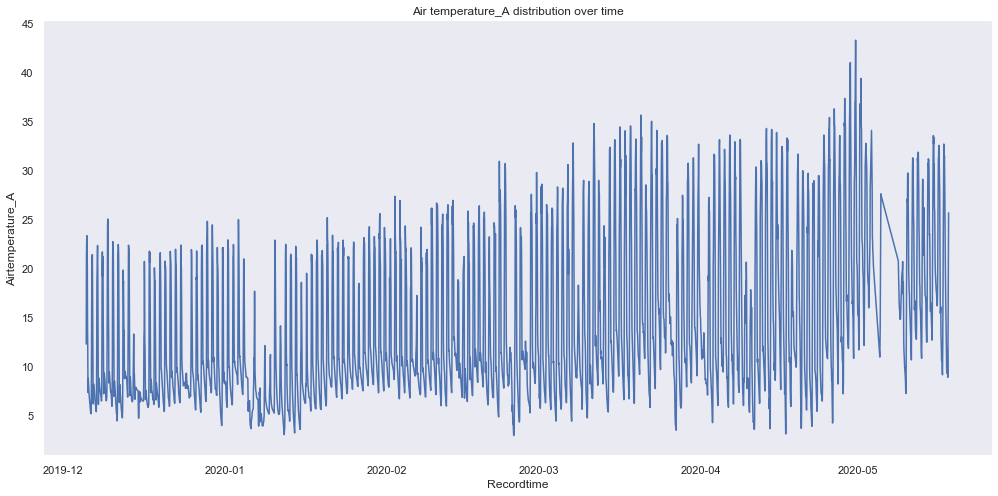

In [20]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.Airtemperature_x)
plt.title('Air temperature_A distribution over time')
plt.ylabel('Airtemperature_A')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

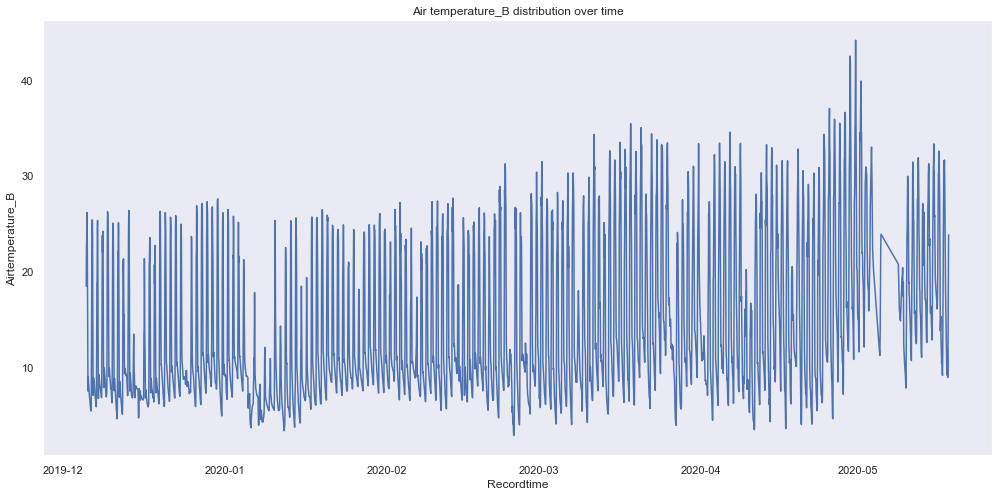

In [21]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.Airtemperature_y)
plt.title('Air temperature_B distribution over time')
plt.ylabel('Airtemperature_B')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

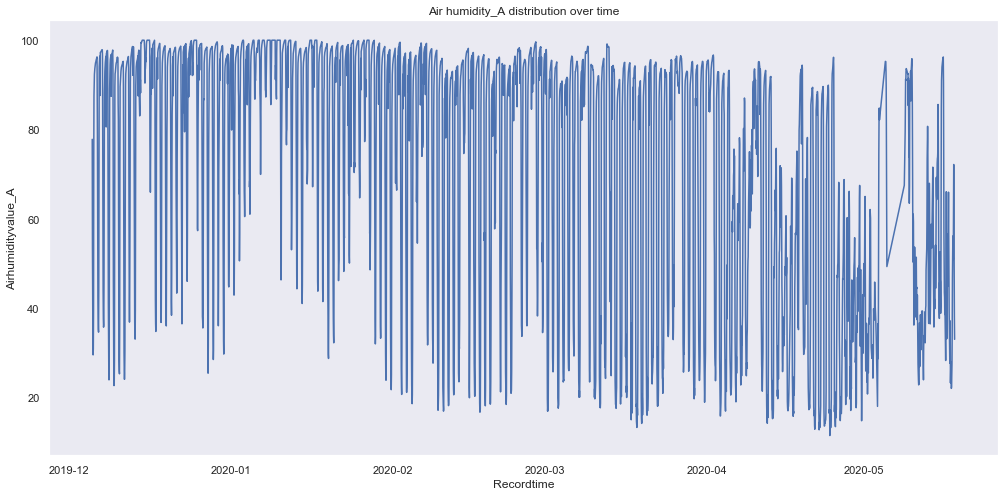

In [22]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.Airhumidityvalue_x)
plt.title('Air humidity_A distribution over time')
plt.ylabel('Airhumidityvalue_A')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

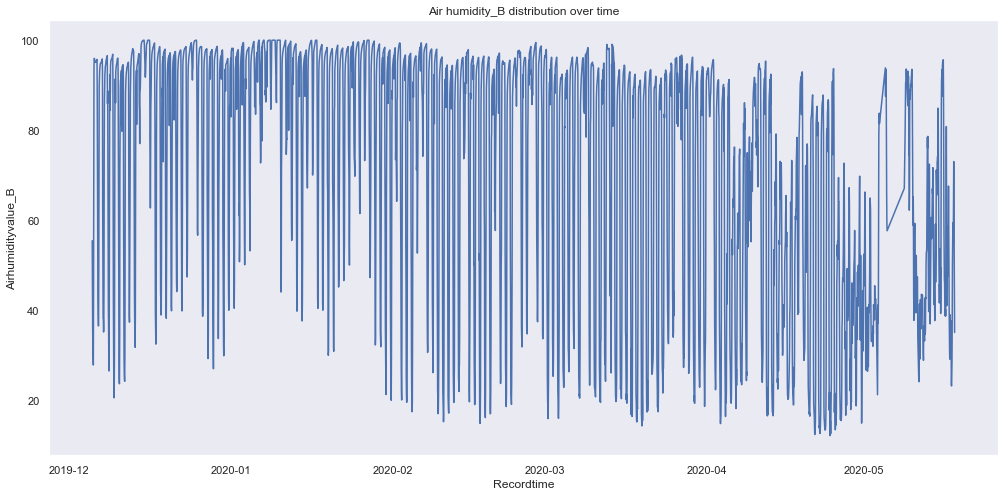

In [23]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.Airhumidityvalue_y)
plt.title('Air humidity_B distribution over time')
plt.ylabel('Airhumidityvalue_B')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

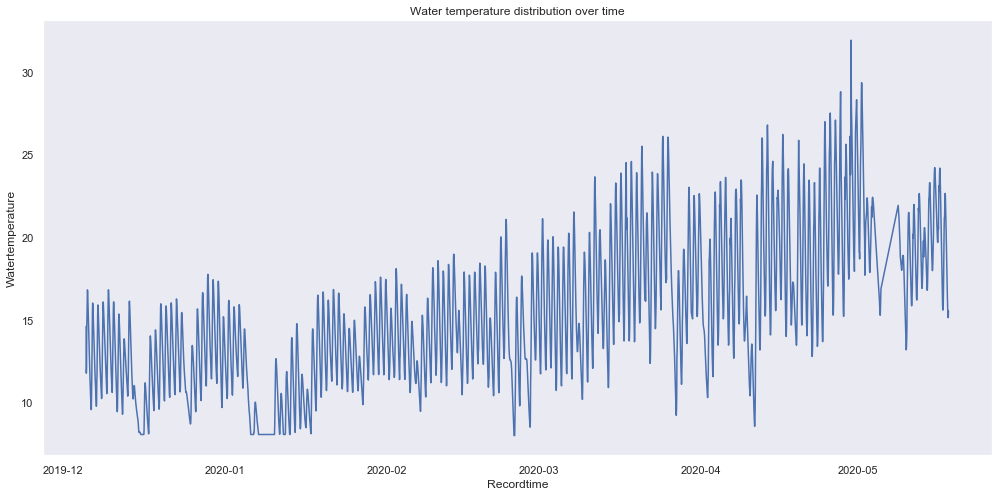

In [24]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.Watertemperature)
plt.title('Water temperature distribution over time')
plt.ylabel('Watertemperature')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

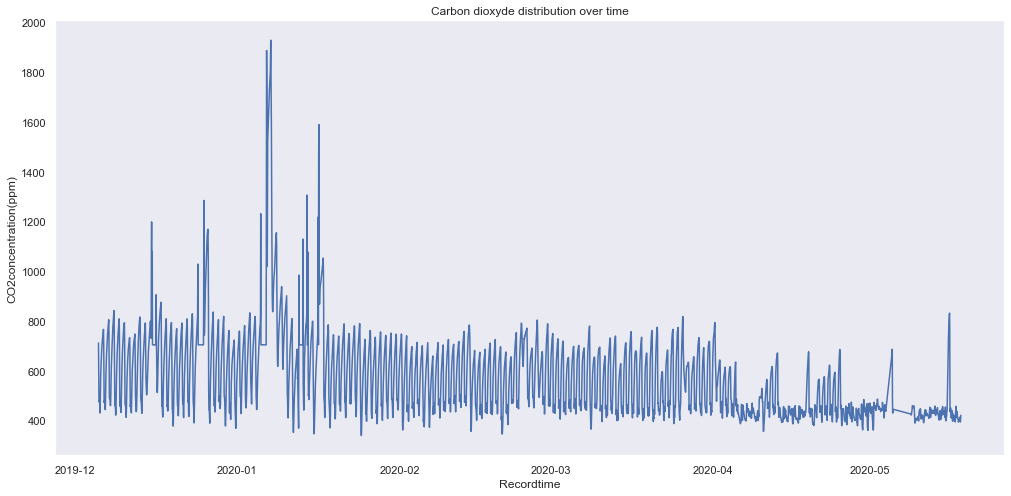

In [25]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.CO2concentration)
plt.title('Carbon dioxyde distribution over time')
plt.ylabel('CO2concentration(ppm)')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

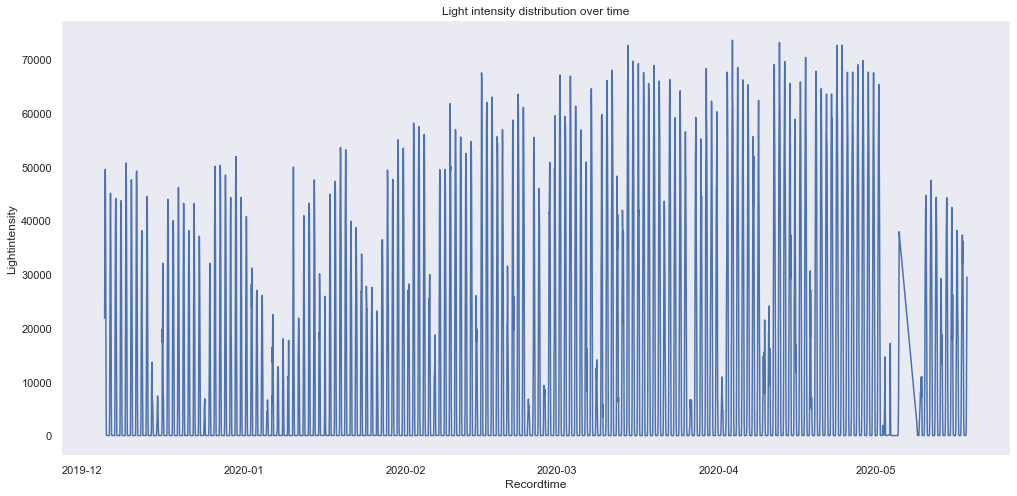

In [26]:
plt.figure(figsize=(17, 8))
plt.plot(read_tog3.Lightintensity)
plt.title('Light intensity distribution over time')
plt.ylabel('Lightintensity')
plt.xlabel('Recordtime')
plt.grid(False)
plt.show()

In [27]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(25,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

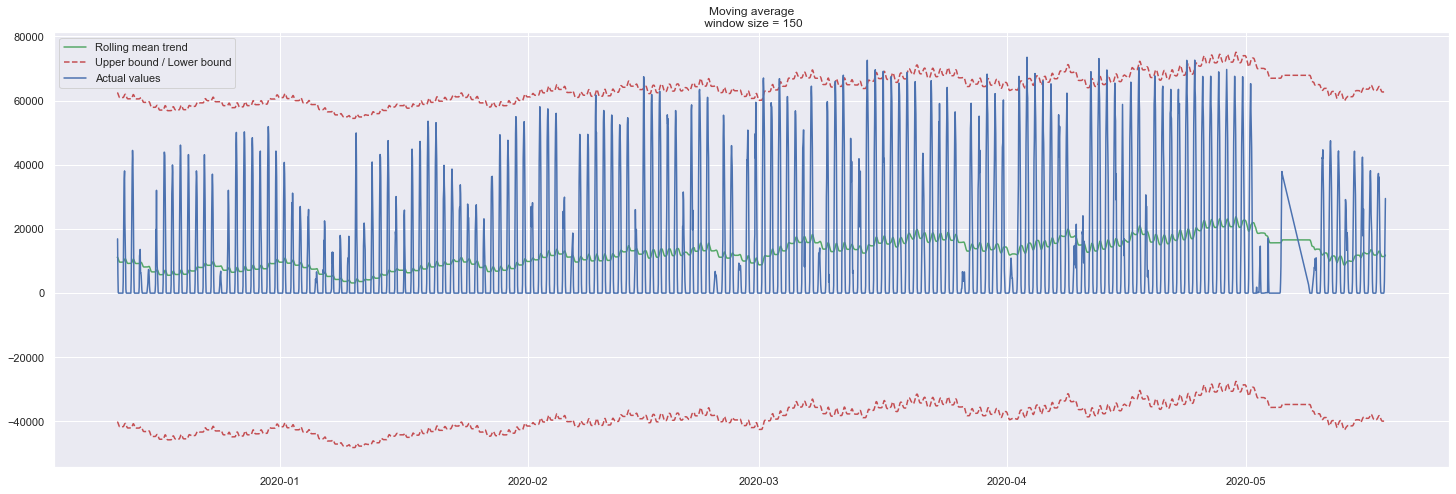

In [28]:
plot_moving_average(read_tog3.Lightintensity, 150, plot_intervals=True)